# DeepEvoOpt: Hyperparameter Optimization for Deep Learning

This notebook provides a UI for running experiments with various meta-heuristic optimizers on CNN and MLP models using Fashion-MNIST.

In [1]:
!git clone https://github.com/A7mdSl7/DeepEvoOpt.git
%cd DeepEvoOpt

Cloning into 'DeepEvoOpt'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 92 (delta 2), reused 17 (delta 2), pack-reused 69 (from 1)
Receiving objects: 100% (92/92), 58.97 MiB | 38.05 MiB/s, done.
Resolving deltas: 100% (15/15), done.
/kaggle/working/DeepEvoOpt


In [2]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import json

# Add src to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.run_experiments import run_experiment, OPTIMIZERS
from src.train import train_final_model

## Configuration

In [6]:
MODEL_TYPE = 'cnn' # 'cnn' or 'mlp'
POP_SIZE = 5
MAX_ITER = 5
OPTIMIZERS_TO_TEST = ['ga', 'pso', 'gwo', 'aco', 'firefly', 'abc', 'obc_woa', 'fcr', 'fcgwo']

## Run Experiments

In [7]:
results = {}

for opt in OPTIMIZERS_TO_TEST:
    print(f"--- Running {opt.upper()} ---")
    best_sol = run_experiment(opt, MODEL_TYPE, POP_SIZE, MAX_ITER)
    results[opt] = best_sol

--- Running GA ---
Running GA on cnn...
Using device: cuda
GA Iteration 1/5, Best Loss: 0.2616
GA Iteration 2/5, Best Loss: 0.2616
GA Iteration 3/5, Best Loss: 0.2616
GA Iteration 4/5, Best Loss: 0.2616
GA Iteration 5/5, Best Loss: 0.2616
Optimization finished. Best Loss: 0.26155447363457146
Best Hyperparams: {'lr': 0.0010181838494634644, 'batch_size': 32, 'dropout': 0.24359175219385137, 'conv1_out': 32, 'kernel1': 5, 'conv2_out': 32, 'kernel2': 5, 'fc1_out': 256, 'hidden1': 64, 'hidden2': 64, 'optimizer': 'adam'}
--- Running PSO ---
Running PSO on cnn...
Using device: cuda
PSO Iteration 1/5, Best Loss: 0.2932
PSO Iteration 2/5, Best Loss: 0.2833
PSO Iteration 3/5, Best Loss: 0.2833
PSO Iteration 4/5, Best Loss: 0.2833
PSO Iteration 5/5, Best Loss: 0.2833
Optimization finished. Best Loss: 0.28328038514294523
Best Hyperparams: {'lr': 0.00867818830087717, 'batch_size': 64, 'dropout': 0.21118944124403685, 'conv1_out': 64, 'kernel1': 5, 'conv2_out': 64, 'kernel2': 3, 'fc1_out': 128, 'hidde

## Visualization

In [10]:
import os, pandas as pd
import matplotlib.pyplot as plt

os.makedirs("results/logs", exist_ok=True)

for opt, val in results.items():
    hist = None
    if isinstance(val, tuple) and len(val) == 2:
        history = val[1]
        hist = pd.DataFrame(history, columns=['iteration', 'val_loss'])
    elif isinstance(val, dict) and 'history' in val:
        history = val['history']
        if len(history) > 0 and isinstance(history[0], (list, tuple)):
            hist = pd.DataFrame(history, columns=['iteration', 'val_loss'])
        else:
            hist = pd.DataFrame(history)
    if hist is None:
        history_file = f"results/logs/{opt}_{MODEL_TYPE}_history.csv"
        if os.path.exists(history_file):
            hist = pd.read_csv(history_file)
    if hist is not None:
        hist.to_csv(f"results/logs/{opt}_{MODEL_TYPE}_history.csv", index=False)
        print("Saved history for", opt, "->", f"results/logs/{opt}_{MODEL_TYPE}_history.csv")
    else:
        print("No history found for", opt, "- skipping save/plot")

Saved history for ga -> results/logs/ga_cnn_history.csv
Saved history for pso -> results/logs/pso_cnn_history.csv
Saved history for gwo -> results/logs/gwo_cnn_history.csv
Saved history for aco -> results/logs/aco_cnn_history.csv
Saved history for firefly -> results/logs/firefly_cnn_history.csv
Saved history for abc -> results/logs/abc_cnn_history.csv
Saved history for obc_woa -> results/logs/obc_woa_cnn_history.csv
Saved history for fcr -> results/logs/fcr_cnn_history.csv
Saved history for fcgwo -> results/logs/fcgwo_cnn_history.csv


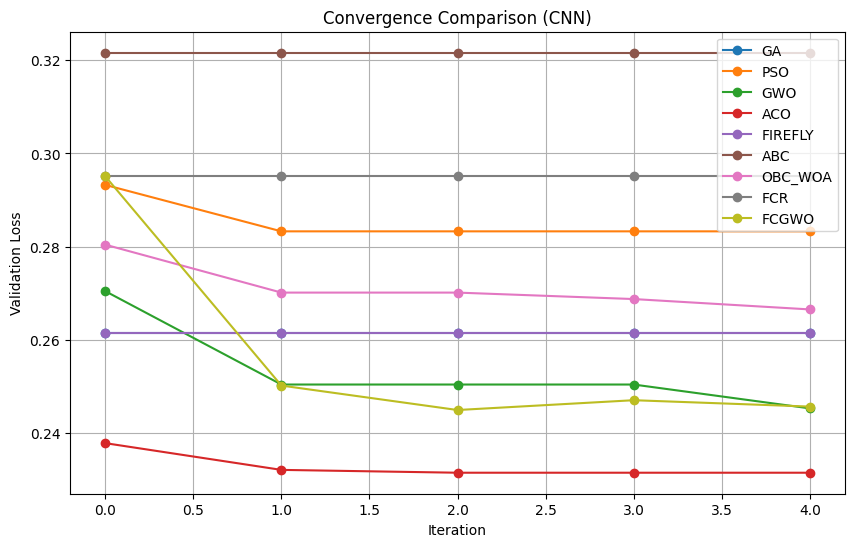

In [11]:
plt.figure(figsize=(10,6))
for opt in OPTIMIZERS_TO_TEST:
    history_file = f'results/logs/{opt}_{MODEL_TYPE}_history.csv'
    if os.path.exists(history_file):
        df = pd.read_csv(history_file)
        if 'iteration' in df.columns and 'val_loss' in df.columns:
            plt.plot(df['iteration'], df['val_loss'], label=opt.upper(), marker='o')
plt.title(f'Convergence Comparison ({MODEL_TYPE.upper()})')
plt.xlabel('Iteration')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## Train Final Model with Best Found Hyperparameters

In [12]:
# Select best optimizer from this run
# For demo, just pick the first one or manually specify
best_opt_name = OPTIMIZERS_TO_TEST[0]
best_params = results[best_opt_name]

print(f"Training final model with params from {best_opt_name.upper()}: {best_params}")
acc = train_final_model(best_params, model_type=MODEL_TYPE, epochs=5)

Training final model with params from GA: {'lr': 0.0010181838494634644, 'batch_size': 32, 'dropout': 0.24359175219385137, 'conv1_out': 32, 'kernel1': 5, 'conv2_out': 32, 'kernel2': 5, 'fc1_out': 256, 'hidden1': 64, 'hidden2': 64, 'optimizer': 'adam'}
Using device: cuda
Starting final training for cnn on cuda...
Epoch 1/5, Train Loss: 0.4625, Val Loss: 0.3210, Val Acc: 0.8813
Epoch 2/5, Train Loss: 0.3068, Val Loss: 0.2859, Val Acc: 0.8958
Epoch 3/5, Train Loss: 0.2667, Val Loss: 0.2823, Val Acc: 0.8940
Epoch 4/5, Train Loss: 0.2363, Val Loss: 0.2635, Val Acc: 0.9028
Epoch 5/5, Train Loss: 0.2119, Val Loss: 0.2555, Val Acc: 0.9053
Final Test Accuracy: 0.9032
Model saved to results/final_model.pth
